## Connect to PostgreSQL database

In [290]:
import psycopg2

try:
    conn = psycopg2.connect(
        dbname="project", 
        user="postgres",       
        password="123",   
        host="localhost",          
        port="5432"                
    )
    print("Connection successful!")
except Exception as e:
    print(f"Connection failed: {e}")
    
cur = conn.cursor()

Connection successful!


## Create Tables in Database

In [291]:
drop_tables = """
DROP TABLE IF EXISTS Delivery_Items      CASCADE;
DROP TABLE IF EXISTS Deliveries          CASCADE;
DROP TABLE IF EXISTS Transaction_Items   CASCADE;
DROP TABLE IF EXISTS Payments            CASCADE;
DROP TABLE IF EXISTS Order_Items         CASCADE;
DROP TABLE IF EXISTS Orders              CASCADE;
DROP TABLE IF EXISTS Inventory           CASCADE;
DROP TABLE IF EXISTS Shifts              CASCADE;
DROP TABLE IF EXISTS Promotions          CASCADE;
DROP TABLE IF EXISTS Vendor_Products     CASCADE;
DROP TABLE IF EXISTS Sales_Transactions  CASCADE;
DROP TABLE IF EXISTS Customers           CASCADE;
DROP TABLE IF EXISTS Employees           CASCADE;
DROP TABLE IF EXISTS Products            CASCADE;
DROP TABLE IF EXISTS Vendors             CASCADE;
DROP TABLE IF EXISTS Stores              CASCADE;
"""
cur.execute(drop_tables)
conn.commit()

#### 1. Create Stores Table

In [292]:
create_stores_table = """
CREATE TABLE Stores (
    store_id 		SERIAL 			PRIMARY KEY,
    name 			VARCHAR(100) 	NOT NULL,
    address 		VARCHAR(255),
    opening_date 	DATE   
);
"""
cur.execute(create_stores_table)
conn.commit()

#### 2. Create Products Table

In [293]:
create_products_table = """
CREATE TABLE Products (
    product_id 		SERIAL 			PRIMARY KEY,
    name 			VARCHAR(100) 	NOT NULL,
    category 		VARCHAR(50),
    unit_price 		NUMERIC(10, 2) 	NOT NULL,
    stock_unit 		VARCHAR(20)
);
"""
cur.execute(create_products_table)
conn.commit()

#### 3. Create Vendors Table

In [294]:
create_vendors_table = """
CREATE TABLE Vendors (
    vendor_id 		SERIAL 			PRIMARY KEY,
    name 			VARCHAR(100) 	NOT NULL,
    contact_info 	VARCHAR(255),
    rating 			NUMERIC(2, 1)
);
"""
cur.execute(create_vendors_table)
conn.commit()

#### 4. Create Vendor_Products Table (Many-to-Many Relationship)

In [295]:
create_vendor_products_table = """
CREATE TABLE Vendor_Products (
    id        		SERIAL 			PRIMARY KEY,
    vendor_id  		INT 			NOT NULL,
    product_id 		INT 			NOT NULL,
    FOREIGN KEY (vendor_id)  REFERENCES Vendors(vendor_id) ON DELETE CASCADE,
    FOREIGN KEY (product_id) REFERENCES Products(product_id) ON DELETE CASCADE,
	UNIQUE (vendor_id, product_id)
);
"""
cur.execute(create_vendor_products_table)
conn.commit()

#### 5. Create Employees Table

In [296]:
create_employees_table = """
CREATE TABLE Employees (
    employee_id 	SERIAL 			PRIMARY KEY,
    first_name  	VARCHAR(50) 	NOT NULL,
    last_name		VARCHAR(50) 	NOT NULL,
    role			VARCHAR(50),
    hire_date		DATE,
	leave_date 		DATE,
    store_id    	INT,
    FOREIGN KEY (store_id) REFERENCES Stores(store_id) ON DELETE SET NULL
);
"""
cur.execute(create_employees_table)
conn.commit()

#### 6. Create Customers Table

In [297]:
create_customers_table = """
CREATE TABLE Customers (
    customer_id 	SERIAL 			PRIMARY KEY,
    first_name 		VARCHAR(50) 	NOT NULL,
    last_name 		VARCHAR(50) 	NOT NULL,
    email 			VARCHAR(100) 	UNIQUE,
    phone_number 	VARCHAR(50),
    membership_level VARCHAR(50) 	DEFAULT 'Standard'
);
"""
cur.execute(create_customers_table)
conn.commit()

#### 7. Create Sales_Transactions Table

In [298]:
create_sales_transactions_table = """
CREATE TABLE Sales_Transactions (
    transaction_id	SERIAL 			PRIMARY KEY,
    store_id		INT 			NOT NULL,
    employee_id     INT				NOT NULL,
    customer_id     INT,
    transaction_date TIMESTAMP 		NOT NULL,
    total_amount	NUMERIC(10,2) 	NOT NULL,
    FOREIGN KEY (store_id)    REFERENCES Stores(store_id) ON DELETE RESTRICT,
    FOREIGN KEY (employee_id) REFERENCES Employees(employee_id) ON DELETE SET NULL,
    FOREIGN KEY (customer_id) REFERENCES Customers(customer_id) ON DELETE SET NULL
);
"""
cur.execute(create_sales_transactions_table)
conn.commit()

#### 8. Create Transaction_Items Table

In [299]:
create_transaction_items_table = """
CREATE TABLE Transaction_Items (
	id             	SERIAL 			PRIMARY KEY,
    transaction_id 	INT 			NOT NULL,
    product_id     	INT 			NOT NULL,
    quantity      	INT 			NOT NULL,
    unit_price     	NUMERIC(10,2) 	NOT NULL,
    FOREIGN KEY (transaction_id) REFERENCES Sales_Transactions(transaction_id) ON DELETE CASCADE,
    FOREIGN KEY (product_id)     REFERENCES Products(product_id) ON DELETE RESTRICT,
	UNIQUE (transaction_id, product_id)
);
"""
cur.execute(create_transaction_items_table)
conn.commit()

#### 9. Create Orders Table

In [300]:
create_orders_table = """
CREATE TABLE Orders (
    order_id   		SERIAL 			PRIMARY KEY,
    vendor_id  		INT 			NOT NULL,
    order_date 		DATE 			NOT NULL,
    status     		VARCHAR(20) 	DEFAULT 'Pending',
    FOREIGN KEY (vendor_id) REFERENCES Vendors(vendor_id) ON DELETE RESTRICT
);
"""
cur.execute(create_orders_table)
conn.commit()

#### 10. Create Order_Items Table

In [301]:
create_order_items_table = """
CREATE TABLE Order_Items (
    id         		SERIAL 			PRIMARY KEY,
    order_id   		INT 			NOT NULL,
    product_id 		INT 			NOT NULL,
    quantity   		INT 			NOT NULL,
    unit_price 		NUMERIC(10,2) 	NOT NULL,
    FOREIGN KEY (order_id)   REFERENCES Orders(order_id) ON DELETE CASCADE,
    FOREIGN KEY (product_id) REFERENCES Products(product_id) ON DELETE RESTRICT
);
"""
cur.execute(create_order_items_table)
conn.commit()

#### 11. Create Deliveries Table

In [302]:
create_deliveries_table = """
CREATE TABLE Deliveries (
    delivery_id   	SERIAL     		PRIMARY KEY,
    order_id      	INT        		NOT NULL,
    store_id      	INT        		NOT NULL,
    delivered_at  	TIMESTAMP  		NOT NULL,
    status        	VARCHAR(20),
    FOREIGN KEY (order_id) REFERENCES Orders(order_id) ON DELETE CASCADE,
    FOREIGN KEY (store_id) REFERENCES Stores(store_id) ON DELETE RESTRICT
);
"""
cur.execute(create_deliveries_table)
conn.commit()

#### 12. Create Delivery_Items Table

In [303]:
create_delivery_items_table = """
CREATE TABLE Delivery_Items (
    id                 SERIAL 		PRIMARY KEY,
    delivery_id        INT 			NOT NULL,
    order_item_id      INT 			NOT NULL,
    quantity_delivered INT 			NOT NULL,
    FOREIGN KEY (delivery_id)  REFERENCES Deliveries(delivery_id) ON DELETE CASCADE,
    FOREIGN KEY (order_item_id) REFERENCES Order_Items(id)        ON DELETE RESTRICT,
    UNIQUE (delivery_id, order_item_id)
);
"""
cur.execute(create_delivery_items_table)
conn.commit()

#### 13. Create Inventory Table

In [304]:
create_inventory_table = """
CREATE TABLE Inventory (
    inventory_id 	SERIAL 			PRIMARY KEY,
    store_id     	INT 			NOT NULL,
    product_id   	INT 			NOT NULL,
    quantity     	INT 			NOT NULL DEFAULT 0,
    last_updated 	DATE 			DEFAULT CURRENT_DATE,
    FOREIGN KEY (store_id)   REFERENCES Stores(store_id) ON DELETE CASCADE,
    FOREIGN KEY (product_id) REFERENCES Products(product_id) ON DELETE CASCADE,
	UNIQUE (store_id, product_id)
);
"""
cur.execute(create_inventory_table)
conn.commit()

#### 14. Create Shifts Table

In [305]:
create_shifts_table = """
CREATE TABLE Shifts (
	shift_id   		SERIAL 			PRIMARY KEY,
    employee_id 	INT 			NOT NULL,
    store_id    	INT 			NOT NULL,
    shift_date      DATE            NOT NULL,
    start_time    	TIMESTAMP 		NOT NULL,
    end_time      	TIMESTAMP 		NOT NULL,
    FOREIGN KEY (employee_id) REFERENCES Employees(employee_id) ON DELETE CASCADE,
    FOREIGN KEY (store_id)    REFERENCES Stores(store_id) ON DELETE CASCADE
);
"""
cur.execute(create_shifts_table)
conn.commit()

#### 15. Create Payments Table

In [306]:
create_payments_table = """
CREATE TABLE Payments (
    payment_id     	SERIAL 			PRIMARY KEY,
    transaction_id 	INT 			NOT NULL,
    payment_method 	VARCHAR(50) 	NOT NULL,
    amount         	NUMERIC(10,2) 	NOT NULL,
    payment_date   	TIMESTAMP,
	status         	VARCHAR(20) 	DEFAULT 'captured',  -- 'captured','void','refunded','pending'
    FOREIGN KEY (transaction_id) REFERENCES Sales_Transactions(transaction_id) ON DELETE CASCADE
);
"""
cur.execute(create_payments_table)
conn.commit()

#### 16. Create Promotions Table

In [307]:
create_promotions_table = """
CREATE TABLE Promotions (
    promo_id      	SERIAL 			PRIMARY KEY,
    product_id    	INT 			NOT NULL,
    discount_rate 	NUMERIC(4,2),
    start_date    	DATE 			NOT NULL,
    end_date      	DATE 			NOT NULL,
    FOREIGN KEY (product_id) REFERENCES Products(product_id) ON DELETE CASCADE
);
"""
cur.execute(create_promotions_table)
conn.commit()

### Triggers

#### SALES: subtract inventory when items are sold

In [308]:
sales_trigger = """
CREATE OR REPLACE FUNCTION inv_on_tx_items()
RETURNS TRIGGER AS $$
DECLARE
  s INT;  -- store
BEGIN
  IF TG_OP = 'INSERT' THEN
    SELECT store_id INTO s FROM Sales_Transactions WHERE transaction_id = NEW.transaction_id;
    -- subtract; make row if missing
    UPDATE Inventory SET quantity = quantity - NEW.quantity, last_updated = CURRENT_DATE
      WHERE store_id = s AND product_id = NEW.product_id;
    IF NOT FOUND THEN
      INSERT INTO Inventory (store_id, product_id, quantity, last_updated)
      VALUES (s, NEW.product_id, 0, CURRENT_DATE);
      UPDATE Inventory SET quantity = quantity - NEW.quantity, last_updated = CURRENT_DATE
        WHERE store_id = s AND product_id = NEW.product_id;
    END IF;
    RETURN NEW;

  ELSIF TG_OP = 'DELETE' THEN
    SELECT store_id INTO s FROM Sales_Transactions WHERE transaction_id = OLD.transaction_id;
    UPDATE Inventory SET quantity = quantity + OLD.quantity, last_updated = CURRENT_DATE
      WHERE store_id = s AND product_id = OLD.product_id;
    RETURN OLD;

  ELSE  -- UPDATE: add back old, subtract new (covers store/product change too)
    SELECT store_id INTO s FROM Sales_Transactions WHERE transaction_id = OLD.transaction_id;
    UPDATE Inventory SET quantity = quantity + OLD.quantity, last_updated = CURRENT_DATE
      WHERE store_id = s AND product_id = OLD.product_id;

    SELECT store_id INTO s FROM Sales_Transactions WHERE transaction_id = NEW.transaction_id;
    UPDATE Inventory SET quantity = quantity - NEW.quantity, last_updated = CURRENT_DATE
      WHERE store_id = s AND product_id = NEW.product_id;
    IF NOT FOUND THEN
      INSERT INTO Inventory (store_id, product_id, quantity, last_updated)
      VALUES (s, NEW.product_id, 0, CURRENT_DATE);
      UPDATE Inventory SET quantity = quantity - NEW.quantity, last_updated = CURRENT_DATE
        WHERE store_id = s AND product_id = NEW.product_id;
    END IF;
    RETURN NEW;
  END IF;
END;
$$ LANGUAGE plpgsql;

DROP TRIGGER IF EXISTS trg_tx_items_inv ON Transaction_Items;
CREATE TRIGGER trg_tx_items_inv
AFTER INSERT OR UPDATE OR DELETE ON Transaction_Items
FOR EACH ROW EXECUTE FUNCTION inv_on_tx_items();
"""
cur.execute(sales_trigger)
conn.commit()

#### RECEIPTS: add inventory when items are delivered

In [309]:
delivery_trigger = """
CREATE OR REPLACE FUNCTION inv_on_delivery_items()
RETURNS TRIGGER AS $$
DECLARE
  s INT;   -- store
  p INT;   -- product
BEGIN
  IF TG_OP = 'INSERT' THEN
    SELECT d.store_id INTO s FROM Deliveries d WHERE d.delivery_id = NEW.delivery_id;
    SELECT oi.product_id INTO p FROM Order_Items oi WHERE oi.id = NEW.order_item_id;

    UPDATE Inventory SET quantity = quantity + NEW.quantity_delivered, last_updated = CURRENT_DATE
      WHERE store_id = s AND product_id = p;
    IF NOT FOUND THEN
      INSERT INTO Inventory (store_id, product_id, quantity, last_updated)
      VALUES (s, p, NEW.quantity_delivered, CURRENT_DATE);
    END IF;
    RETURN NEW;

  ELSIF TG_OP = 'DELETE' THEN
    SELECT d.store_id INTO s FROM Deliveries d WHERE d.delivery_id = OLD.delivery_id;
    SELECT oi.product_id INTO p FROM Order_Items oi WHERE oi.id = OLD.order_item_id;

    UPDATE Inventory SET quantity = quantity - OLD.quantity_delivered, last_updated = CURRENT_DATE
      WHERE store_id = s AND product_id = p;
    RETURN OLD;

  ELSE  -- UPDATE
    -- remove old
    SELECT d.store_id INTO s FROM Deliveries d WHERE d.delivery_id = OLD.delivery_id;
    SELECT oi.product_id INTO p FROM Order_Items oi WHERE oi.id = OLD.order_item_id;
    UPDATE Inventory SET quantity = quantity - OLD.quantity_delivered, last_updated = CURRENT_DATE
      WHERE store_id = s AND product_id = p;

    -- apply new
    SELECT d.store_id INTO s FROM Deliveries d WHERE d.delivery_id = NEW.delivery_id;
    SELECT oi.product_id INTO p FROM Order_Items oi WHERE oi.id = NEW.order_item_id;
    UPDATE Inventory SET quantity = quantity + NEW.quantity_delivered, last_updated = CURRENT_DATE
      WHERE store_id = s AND product_id = p;
    IF NOT FOUND THEN
      INSERT INTO Inventory (store_id, product_id, quantity, last_updated)
      VALUES (s, p, NEW.quantity_delivered, CURRENT_DATE);
    END IF;
    RETURN NEW;
  END IF;
END;
$$ LANGUAGE plpgsql;

DROP TRIGGER IF EXISTS trg_delivery_items_inv ON Delivery_Items;
CREATE TRIGGER trg_delivery_items_inv
AFTER INSERT OR UPDATE OR DELETE ON Delivery_Items
FOR EACH ROW EXECUTE FUNCTION inv_on_delivery_items();
"""
cur.execute(delivery_trigger)
conn.commit()

### Add Constraints and Indexes

In [ ]:
add_constraints_and_indexes = """
ALTER TABLE IF EXISTS Orders             ADD COLUMN IF NOT EXISTS total_amount NUMERIC(12,2) DEFAULT 0;
ALTER TABLE IF EXISTS Sales_Transactions ADD COLUMN IF NOT EXISTS total_amount NUMERIC(12,2) DEFAULT 0;

ALTER TABLE IF EXISTS Inventory          ADD CONSTRAINT uq_inventory_store_product         UNIQUE (store_id, product_id);
ALTER TABLE IF EXISTS Transaction_Items  ADD CONSTRAINT uq_ti_tx_product                   UNIQUE (transaction_id, product_id);
ALTER TABLE IF EXISTS Order_Items        ADD CONSTRAINT uq_oi_order_product                UNIQUE (order_id, product_id);
ALTER TABLE IF EXISTS Vendor_Products    ADD CONSTRAINT uq_vp_vendor_product               UNIQUE (vendor_id, product_id);

ALTER TABLE IF EXISTS Products           ADD CONSTRAINT chk_products_unit_price_nonneg     CHECK (unit_price >= 0);
ALTER TABLE IF EXISTS Inventory          ADD CONSTRAINT chk_inventory_qty_nonneg           CHECK (quantity >= 0);
ALTER TABLE IF EXISTS Transaction_Items  ADD CONSTRAINT chk_ti_qty_pos                     CHECK (quantity > 0);
ALTER TABLE IF EXISTS Transaction_Items  ADD CONSTRAINT chk_ti_price_nonneg                CHECK (unit_price >= 0);
ALTER TABLE IF EXISTS Order_Items        ADD CONSTRAINT chk_oi_qty_pos                     CHECK (quantity > 0);
ALTER TABLE IF EXISTS Order_Items        ADD CONSTRAINT chk_oi_price_nonneg                CHECK (unit_price >= 0);
ALTER TABLE IF EXISTS Promotions         ADD CONSTRAINT chk_promos_date_order              CHECK (end_date >= start_date);
ALTER TABLE IF EXISTS Shifts             ADD CONSTRAINT chk_shifts_time_order              CHECK (end_time > start_time);
ALTER TABLE IF EXISTS Payments           ADD CONSTRAINT chk_payments_amount_nonneg         CHECK (amount >= 0);

CREATE INDEX IF NOT EXISTS idx_st_store_date     ON Sales_Transactions (store_id, transaction_date);
CREATE INDEX IF NOT EXISTS idx_st_customer       ON Sales_Transactions (customer_id);
CREATE INDEX IF NOT EXISTS idx_st_employee       ON Sales_Transactions (employee_id);
CREATE INDEX IF NOT EXISTS idx_st_date           ON Sales_Transactions (transaction_date);

CREATE INDEX IF NOT EXISTS idx_ti_tx             ON Transaction_Items (transaction_id);
CREATE INDEX IF NOT EXISTS idx_ti_product        ON Transaction_Items (product_id);

CREATE INDEX IF NOT EXISTS idx_orders_vendor_date ON Orders (vendor_id, order_date);
CREATE INDEX IF NOT EXISTS idx_orders_status      ON Orders (status);
CREATE INDEX IF NOT EXISTS idx_oi_order           ON Order_Items (order_id);
CREATE INDEX IF NOT EXISTS idx_oi_product         ON Order_Items (product_id);

CREATE INDEX IF NOT EXISTS idx_deliveries_order  ON Deliveries (order_id);
CREATE INDEX IF NOT EXISTS idx_deliveries_store  ON Deliveries (store_id);
CREATE INDEX IF NOT EXISTS idx_deliveries_time   ON Deliveries (delivered_at);

CREATE INDEX IF NOT EXISTS idx_inv_store         ON Inventory (store_id);
CREATE INDEX IF NOT EXISTS idx_inv_product       ON Inventory (product_id);

CREATE INDEX IF NOT EXISTS idx_employees_store   ON Employees (store_id);
CREATE INDEX IF NOT EXISTS idx_products_category ON Products (category);
CREATE INDEX IF NOT EXISTS idx_vendor_products_v ON Vendor_Products (vendor_id);
CREATE INDEX IF NOT EXISTS idx_vendor_products_p ON Vendor_Products (product_id);
CREATE INDEX IF NOT EXISTS idx_promotions_prod   ON Promotions (product_id);
CREATE INDEX IF NOT EXISTS idx_promotions_dates  ON Promotions (start_date, end_date);
CREATE INDEX IF NOT EXISTS idx_payments_tx       ON Payments (transaction_id);
CREATE INDEX IF NOT EXISTS idx_payments_date     ON Payments (payment_date);
CREATE INDEX IF NOT EXISTS idx_payments_method   ON Payments (payment_method);
"""

cur.execute(add_constraints_and_indexes)
conn.commit()
print("Constraints & indexes installed.")


Constraints & indexes installed.


### Data Simulation & ETL

In [311]:
import re
import datetime as dt
import random
import pandas as pd
from faker import Faker
from psycopg2.extras import execute_values

In [312]:
fake = Faker()
Faker.seed(0)
random.seed(0)

In [313]:
def ensure_support_tables():
    cur.execute("""
    CREATE TABLE IF NOT EXISTS rejects(
        id SERIAL PRIMARY KEY,
        table_name TEXT,
        raw_payload JSONB,
        reason TEXT,
        created_at TIMESTAMP DEFAULT now()
    );
    """)
    cur.execute("""
    CREATE TABLE IF NOT EXISTS etl_run_log(
        id SERIAL PRIMARY KEY,
        run_started TIMESTAMP,
        run_ended   TIMESTAMP,
        status      TEXT,
        message     TEXT
    );
    """)
    conn.commit()


In [314]:
def exec_values_upsert(cur, table, cols, rows, conflict, update_set_sql):
    if not rows: 
        return 0
    cols_sql = ','.join(cols)
    tpl = '(' + ','.join(['%s']*len(cols)) + ')'
    upsert_sql = f"""
      INSERT INTO {table} ({cols_sql}) VALUES %s
      ON CONFLICT {conflict} DO UPDATE SET {update_set_sql}
    """
    execute_values(cur, upsert_sql, rows, template=tpl, page_size=5000)
    return len(rows)

In [315]:
def exec_values_insert(cur, table, cols, rows, on_conflict_do_nothing=False, conflict_cols=None):
    if not rows:
        return 0
    cols_sql = ','.join(cols)
    tpl = '(' + ','.join(['%s']*len(cols)) + ')'
    sql = f"INSERT INTO {table} ({cols_sql}) VALUES %s"
    if on_conflict_do_nothing and conflict_cols:
        sql += f" ON CONFLICT ({','.join(conflict_cols)}) DO NOTHING"
    execute_values(cur, sql, rows, template=tpl, page_size=5000)
    return len(rows)

In [316]:
def push_rejects(cur, table_name, df_bad, reason):
    if df_bad is None or len(df_bad)==0: 
        return
    rows = []
    for row in df_bad.to_dict(orient="records"):
        rows.append((table_name, row, reason, dt.datetime.utcnow()))
    execute_values(cur, 
      "INSERT INTO rejects (table_name, raw_payload, reason, created_at) VALUES %s",
      rows, page_size=1000)

In [ ]:
def generate_stores(num=10):
    stores = []
    for _ in range(num):
        store = {
            'store_id': fake.unique.random_number(),
            'name': fake.company(),
            'address': fake.address(),
            'opening_date': fake.date_this_decade()
        }
        stores.append(store)
    return pd.DataFrame(stores)

import faker_commerce
fake = Faker('en_US')
fake.add_provider(faker_commerce.Provider)

def generate_products(num=50):
    products = []
    categories = ['Electronics', 'Furniture', 'Clothing', 'Food', 'Toys']
    for _ in range(num):
        product = {
            'product_id': fake.unique.random_number(),
            'name': fake.unique.ecommerce_name(),
            'category': random.choice(categories),
            'unit_price': round(random.uniform(5, 500), 2),
            'stock_unit': random.choice(['Piece', 'Box', 'Kg', 'Bottle'])
        }
        products.append(product)
    return pd.DataFrame(products)

def generate_vendors(num=10):
    vendors = []
    for _ in range(num):
        vendor = {
            'vendor_id': fake.unique.random_number(),
            'name': fake.company(),
            'contact_info': fake.phone_number(),
            'rating': round(random.uniform(0, 5), 1)
        }
        vendors.append(vendor)
    return pd.DataFrame(vendors)

def gen_employees(n=40, store_ids=None):
    employees = []
    roles = ['Cashier', 'Salesperson', 'Manager', 'Supervisor']
    
    for _ in range(n):
        eid = fake.unique.random_number()
        hire_date = fake.date_between(start_date="-4y", end_date="-30d")
        
        if random.random() < 0.3:
            leave_date = fake.date_between(
                start_date=hire_date + dt.timedelta(days=30),
                end_date="today"
            )
        else:
            leave_date = None
        
        employees.append({
            "employee_id": eid,
            "first_name": fake.first_name(),
            "last_name": fake.last_name(),
            "role": random.choice(roles),
            "hire_date": hire_date,
            "leave_date": leave_date,
            "store_id": random.choice(store_ids)
        })
    
    return pd.DataFrame(employees)

def generate_customers(num=100):
    customers = []
    for _ in range(num):
        email = fake.unique.email()
        customer = {
            'customer_id': fake.unique.random_number(),
            'first_name': fake.first_name(),
            'last_name': fake.last_name(),
            'email': email,
            'phone_number': fake.phone_number(),
            'membership_level': random.choice(['Standard', 'Silver', 'Gold', 'Platinum'])
        }
        customers.append(customer)
    return pd.DataFrame(customers)

def generate_sales_transactions(num=100, store_ids=None, employee_ids=None, customer_ids=None):
    sales_transactions = []
    for _ in range(num):
        transaction = {
            'transaction_id': fake.unique.random_number(),
            'store_id': random.choice(store_ids) if store_ids else fake.random_int(min=1, max=10),
            'employee_id': random.choice(employee_ids) if employee_ids else fake.random_int(min=1, max=20),
            'customer_id': random.choice(customer_ids) if customer_ids else fake.random_int(min=1, max=100),
            'transaction_date': fake.date_time_this_year(), 
            'total_amount': round(random.uniform(50, 500), 2)
        }
        sales_transactions.append(transaction)
    return pd.DataFrame(sales_transactions)

def generate_transaction_items(num=300, transaction_ids=None, product_ids=None):
    transaction_items = []
    for _ in range(num):
        item = {
            'id': fake.unique.random_number(),
            'transaction_id': random.choice(transaction_ids) if transaction_ids else fake.random_int(min=1, max=100),
            'product_id': random.choice(product_ids) if product_ids else fake.random_int(min=1, max=50),
            'quantity': random.randint(1, 10),
            'unit_price': round(random.uniform(5, 500), 2)
        }
        transaction_items.append(item)
    return pd.DataFrame(transaction_items)

def generate_orders(num=20, vendor_ids=None):
    orders = []
    for _ in range(num):
        order = {
            'order_id': fake.unique.random_number(),
            'vendor_id': random.choice(vendor_ids) if vendor_ids else fake.random_int(min=1, max=10),
            'order_date': fake.date_this_year(),
            'status': random.choice(['Pending', 'Completed', 'Cancelled'])
        }
        orders.append(order)
    return pd.DataFrame(orders)

def generate_inventory(num=50, store_ids=None, product_ids=None):
    inventory = []
    store_ids = store_ids if store_ids else list(range(1, 11))
    product_ids = product_ids if product_ids else list(range(1, 51))

    used_pairs = set()
    used_inv_ids = set()
    attempts = 0
    max_attempts = num * 3

    while len(inventory) < num and attempts < max_attempts:
        store_id = random.choice(store_ids)
        product_id = random.choice(product_ids)
        if (store_id, product_id) in used_pairs:
            attempts += 1
            continue
        inv_id = fake.random_number()
        if inv_id in used_inv_ids:
            attempts += 1
            continue
        inv = {
            'inventory_id': inv_id,
            'store_id': store_id,
            'product_id': product_id,
            'quantity': random.randint(0, 100),
            'last_updated': fake.date_this_year()
        }
        inventory.append(inv)
        used_pairs.add((store_id, product_id))
        used_inv_ids.add(inv_id)
        attempts = 0
    if len(inventory) < num:
        print(f"Warning: Only generated {len(inventory)} inventory rows due to uniqueness.")
    return pd.DataFrame(inventory)

def generate_vendor_products(num=30, vendor_ids=None, product_ids=None):
    vendor_products = []
    vendor_ids = vendor_ids if vendor_ids else list(range(1, 11))
    product_ids = product_ids if product_ids else list(range(1, 51))
    used_pairs = set()
    attempts = 0
    max_attempts = num * 3
    while len(vendor_products) < num and attempts < max_attempts:
        vendor_id = random.choice(vendor_ids)
        product_id = random.choice(product_ids)
        if (vendor_id, product_id) in used_pairs:
            attempts += 1
            continue
        vendor_products.append({'vendor_id': vendor_id, 'product_id': product_id})
        used_pairs.add((vendor_id, product_id))
        attempts = 0
    if len(vendor_products) < num:
        print(f"Warning: Only generated {len(vendor_products)} vendor-product pairs.")
    return pd.DataFrame(vendor_products)

def generate_order_items(num=50, order_ids=None, product_ids=None):
    order_items = []
    for _ in range(num):
        item = {
            'order_id': random.choice(order_ids) if order_ids else fake.random_int(min=1, max=20),
            'product_id': random.choice(product_ids) if product_ids else fake.random_int(min=1, max=50),
            'quantity': random.randint(1, 100),
            'unit_price': round(random.uniform(1, 200), 2)
        }
        order_items.append(item)
    return pd.DataFrame(order_items)

def gen_deliveries(n=50, order_ids=None, store_ids=None):
    deliveries = []
    statuses = ["Pending", "Shipped", "Delivered", "Cancelled"]

    for _ in range(n):
        deliveries.append({
            "order_id": random.choice(order_ids),
            "store_id": random.choice(store_ids),
            "delivered_at": fake.date_time_between(start_date="-1y", end_date="now"),
            "status": random.choice(statuses)
        })

    return pd.DataFrame(deliveries)

def gen_delivery_items_df(cur, max_items_per_delivery=2):

    cur.execute("SELECT delivery_id, order_id FROM Deliveries;")
    deliveries = cur.fetchall()  

    cur.execute("SELECT id, order_id, quantity FROM Order_Items;")
    order_items = cur.fetchall()  

    items_by_order = {}
    for oi_id, ord_id, qty in order_items:
        items_by_order.setdefault(ord_id, []).append((oi_id, qty))

    rows = []
    for d_id, ord_id in deliveries:
        candidates = items_by_order.get(ord_id, [])
        if not candidates:
            continue
        k = random.randint(1, min(max_items_per_delivery, len(candidates)))
        pick = random.sample(candidates, k)  

        for oi_id, oi_qty in pick:
            q_del = random.randint(1, max(1, int(oi_qty))) 
            rows.append((d_id, oi_id, q_del))

    return pd.DataFrame(rows, columns=['delivery_id','order_item_id','quantity_delivered'])

def generate_shifts(num=50, employee_ids=None, store_ids=None):
    rows = []
    for _ in range(num):
        d = fake.date_between(start_date="-90d", end_date="+10d")
        h = random.randint(6, 12)
        start_dt = dt.datetime.combine(d, dt.time(hour=h, minute=0, second=0))
        end_dt   = start_dt + dt.timedelta(hours=8)

        rows.append({
            "employee_id": random.choice(employee_ids),
            "store_id":    random.choice(store_ids),
            'shift_date': fake.date_this_year(),
            "start_time":  start_dt,   
            "end_time":    end_dt
        })
    df = pd.DataFrame(rows)
    df["start_time"] = pd.to_datetime(df["start_time"])
    df["end_time"]   = pd.to_datetime(df["end_time"])
    return df

def generate_payments(num=80, transaction_ids=None):
    payments = []
    methods = ['Credit Card', 'Debit Card', 'Cash', 'Mobile Payment', 'Gift Card']
    for _ in range(num):
        payment = {
            'transaction_id': random.choice(transaction_ids) if transaction_ids else fake.random_int(min=1, max=100),
            'payment_method': random.choice(methods),
            'amount': round(random.uniform(10, 500), 2),
            'payment_date': fake.date_time_this_year()
        }
        payments.append(payment)
    return pd.DataFrame(payments)

def generate_promotions(num=15, product_ids=None):
    promotions = []
    for _ in range(num):
        start_date = fake.date_this_year()
        end_date = fake.date_between(start_date=start_date, end_date='+30d')
        promo = {
            'product_id': random.choice(product_ids) if product_ids else fake.random_int(min=1, max=50),
            'discount_rate': round(random.uniform(5, 50), 2),
            'start_date': start_date,
            'end_date': end_date
        }
        promotions.append(promo)
    return pd.DataFrame(promotions)

In [318]:
ensure_support_tables()
run_started = dt.datetime.utcnow()

C:\Users\dengx\AppData\Local\Temp\ipykernel_422836\2541032654.py:2: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  run_started = dt.datetime.utcnow()


In [ ]:
import pandas as pd
import random
import datetime as dt
import psycopg2.extras as pexp

def exec_values_insert(cur, table, cols, rows, on_conflict_do_nothing=False, conflict_cols=None):
    sql = f"INSERT INTO {table} ({', '.join(cols)}) VALUES %s"
    if on_conflict_do_nothing and conflict_cols:
        sql += f" ON CONFLICT ({', '.join(conflict_cols)}) DO NOTHING"
    pexp.execute_values(cur, sql, rows, page_size=200)

def exec_values_upsert(cur, table, cols, rows, conflict, update_set_sql):
    sql = (
        f"INSERT INTO {table} ({', '.join(cols)}) VALUES %s "
        f"ON CONFLICT {conflict} DO UPDATE SET {update_set_sql}"
    )
    pexp.execute_values(cur, sql, rows, page_size=200)

def dedupe_by_keys(df: pd.DataFrame, keys: list):
    return df.drop_duplicates(subset=keys, keep='last').copy()

def filter_fk(df: pd.DataFrame, fk_map: dict):
    """fk_map: {col: set_of_valid_ids}"""
    out = df.copy()
    for col, valid in fk_map.items():
        out = out[out[col].isin(valid)]
    return out

def ensure_positive_int(df: pd.DataFrame, col: str, min_val: int = 1, max_val: int | None = None):
    out = df.copy()
    out[col] = out[col].fillna(min_val).astype(int)
    out.loc[out[col] < min_val, col] = min_val
    if max_val is not None:
        out.loc[out[col] > max_val, col] = max_val
    return out

def ensure_nonneg_numeric(df: pd.DataFrame, col: str):
    out = df.copy()
    out[col] = out[col].fillna(0)
    out.loc[out[col] < 0, col] = 0
    return out

def clean_customers(df: pd.DataFrame):
    out = df.copy()
    out = out[out['email'].str.contains('@', na=False)]
    out = out.drop_duplicates(subset=['email'], keep='last')
    return out

def clean_promotions(df: pd.DataFrame):
    out = df.copy()
    out = out[(out['discount_rate'] >= 0) & (out['discount_rate'] <= 90)]
    out = out[out['end_date'] >= out['start_date']]
    return out

def clean_shifts(df: pd.DataFrame):
    out = df.copy()
    out = out[out['end_time'] > out['start_time']]
    return out


try:
    cur.execute("BEGIN;")

    stores_df    = generate_stores(10)
    products_df  = generate_products(50)
    vendors_df   = generate_vendors(10)

    employees_df = gen_employees(40, stores_df['store_id'].tolist())
    customers_df = generate_customers(100)

    orders_df    = generate_orders(30, vendors_df['vendor_id'].tolist())
    vendor_products_df = generate_vendor_products(60, vendors_df['vendor_id'].tolist(), products_df['product_id'].tolist())
    inventory_df = generate_inventory(120, stores_df['store_id'].tolist(), products_df['product_id'].tolist())

    sales_df      = generate_sales_transactions(
        150,
        stores_df['store_id'].tolist(),
        employees_df['employee_id'].tolist(),
        customers_df['customer_id'].tolist()
    )
    order_items_df = generate_order_items(120, orders_df['order_id'].tolist(), products_df['product_id'].tolist())
    payments_df    = generate_payments(120, sales_df['transaction_id'].tolist())
    promotions_df  = generate_promotions(20, products_df['product_id'].tolist())
    shifts_df      = generate_shifts(80, employees_df['employee_id'].tolist(), stores_df['store_id'].tolist())
    deliveries_df  = gen_deliveries(40, orders_df['order_id'].tolist(), stores_df['store_id'].tolist())

    order_items_df = ensure_positive_int(order_items_df, 'quantity', 1, 50)
    order_items_df = ensure_nonneg_numeric(order_items_df, 'unit_price')

    payments_df    = ensure_nonneg_numeric(payments_df, 'amount')

    customers_clean  = clean_customers(customers_df)
    promotions_clean = clean_promotions(promotions_df)
    shifts_clean     = clean_shifts(shifts_df)

    exec_values_insert(cur, 'Stores',
        ['store_id','name','address','opening_date'],
        list(stores_df[['store_id','name','address','opening_date']].itertuples(index=False, name=None)),
        on_conflict_do_nothing=True, conflict_cols=['store_id']
    )
    store_ids = set(stores_df['store_id'])

    exec_values_insert(cur, 'Products',
        ['product_id','name','category','unit_price','stock_unit'],
        list(products_df[['product_id','name','category','unit_price','stock_unit']].itertuples(index=False, name=None)),
        on_conflict_do_nothing=True, conflict_cols=['product_id']
    )
    product_ids = set(products_df['product_id'])

    exec_values_insert(cur, 'Vendors',
        ['vendor_id','name','contact_info','rating'],
        list(vendors_df[['vendor_id','name','contact_info','rating']].itertuples(index=False, name=None)),
        on_conflict_do_nothing=True, conflict_cols=['vendor_id']
    )
    vendor_ids = set(vendors_df['vendor_id'])

    exec_values_upsert(cur, 'Customers',
        ['customer_id','first_name','last_name','email','phone_number','membership_level'],
        list(customers_clean[['customer_id','first_name','last_name','email','phone_number','membership_level']]
             .itertuples(index=False, name=None)),
        conflict='(email)',
        update_set_sql=("first_name=EXCLUDED.first_name, "
                        "last_name=EXCLUDED.last_name, "
                        "phone_number=EXCLUDED.phone_number, "
                        "membership_level=EXCLUDED.membership_level")
    )
    customer_ids = set(customers_clean['customer_id'])

    exec_values_insert(cur, 'Employees',
        ['employee_id','first_name','last_name','role','hire_date','leave_date','store_id'],
        list(employees_df[['employee_id','first_name','last_name','role','hire_date','leave_date','store_id']]
             .itertuples(index=False, name=None)),
        on_conflict_do_nothing=True, conflict_cols=['employee_id']
    )
    employee_ids = set(employees_df['employee_id'])

    inv_df = filter_fk(inventory_df, {'store_id': store_ids, 'product_id': product_ids})
    inv_df = dedupe_by_keys(inv_df, ['store_id','product_id'])
    exec_values_upsert(cur, 'Inventory',
        ['store_id','product_id','quantity','last_updated'],
        list(inv_df[['store_id','product_id','quantity','last_updated']].itertuples(index=False, name=None)),
        conflict='(store_id, product_id)',
        update_set_sql='quantity=EXCLUDED.quantity, last_updated=EXCLUDED.last_updated'
    )

    vp_df = filter_fk(vendor_products_df, {'vendor_id': vendor_ids, 'product_id': product_ids})
    vp_df = dedupe_by_keys(vp_df, ['vendor_id','product_id'])
    exec_values_insert(cur, 'Vendor_Products',
        ['vendor_id','product_id'],
        list(vp_df[['vendor_id','product_id']].itertuples(index=False, name=None)),
        on_conflict_do_nothing=True, conflict_cols=['vendor_id','product_id']
    )

    orders_df = filter_fk(orders_df, {'vendor_id': vendor_ids})
    exec_values_insert(cur, 'Orders',
        ['order_id','vendor_id','order_date','status'],
        list(orders_df[['order_id','vendor_id','order_date','status']].itertuples(index=False, name=None)),
        on_conflict_do_nothing=True, conflict_cols=['order_id']
    )
    order_ids = set(orders_df['order_id'])

    oi_df = filter_fk(order_items_df, {'order_id': order_ids, 'product_id': product_ids})
    oi_df = dedupe_by_keys(oi_df, ['order_id','product_id'])
    oi_df = ensure_positive_int(oi_df, 'quantity', 1, 50)
    oi_df = ensure_nonneg_numeric(oi_df, 'unit_price')

    exec_values_upsert(cur, 'Order_Items',
        ['order_id','product_id','quantity','unit_price'],
        list(oi_df[['order_id','product_id','quantity','unit_price']].itertuples(index=False, name=None)),
        conflict='(order_id, product_id)',
        update_set_sql='quantity=EXCLUDED.quantity, unit_price=EXCLUDED.unit_price'
    )

    deliveries_df = filter_fk(deliveries_df, {'order_id': order_ids, 'store_id': store_ids})
    exec_values_insert(cur, 'Deliveries',
        ['order_id','store_id','delivered_at','status'],
        list(deliveries_df[['order_id','store_id','delivered_at','status']].itertuples(index=False, name=None)),
        on_conflict_do_nothing=False
    )
    di_df = gen_delivery_items_df(cur, max_items_per_delivery=3)

    di_df = di_df.drop_duplicates(subset=['delivery_id','order_item_id'])

    exec_values_insert(
        cur, 'Delivery_Items',
        ['delivery_id','order_item_id','quantity_delivered'],
        list(di_df[['delivery_id','order_item_id','quantity_delivered']].itertuples(index=False, name=None)),
        on_conflict_do_nothing=True,
        conflict_cols=['delivery_id','order_item_id']
    )


    st_df = filter_fk(sales_df, {'store_id': store_ids, 'employee_id': employee_ids, 'customer_id': customer_ids})
    exec_values_insert(cur, 'Sales_Transactions',
        ['transaction_id','store_id','employee_id','customer_id','transaction_date','total_amount'],
        list(st_df[['transaction_id','store_id','employee_id','customer_id','transaction_date','total_amount']]
             .itertuples(index=False, name=None)),
        on_conflict_do_nothing=True, conflict_cols=['transaction_id']
    )
    txn_ids = set(st_df['transaction_id'])

    price_map = {int(r.product_id): float(r.unit_price) for r in
                 products_df[['product_id','unit_price']].itertuples(index=False)}
    inv_map = {(int(r.store_id), int(r.product_id)): int(r.quantity)
               for r in inv_df[['store_id','product_id','quantity']].itertuples(index=False)}

    ti_rows = []
    rng = random.Random(42)

    for tx in st_df[['transaction_id','store_id']].itertuples(index=False):
        store = int(tx.store_id)
        for _ in range(rng.randint(1, 3)):
            candidates = [pid for (sid, pid), qty in inv_map.items()
                          if sid == store and qty > 0]
            if not candidates:
                break
            pid = rng.choice(candidates)
            avail = inv_map[(store, pid)]
            qty = rng.randint(1, min(5, avail))
            inv_map[(store, pid)] = avail - qty
            price = price_map.get(pid, round(rng.uniform(5, 500), 2))
            ti_rows.append((int(tx.transaction_id), pid, qty, price))

    ti_df = pd.DataFrame(ti_rows, columns=['transaction_id', 'product_id', 'quantity', 'unit_price'])

    ti_df = ti_df.dropna(subset=['transaction_id', 'product_id', 'quantity', 'unit_price'])
    ti_df['transaction_id'] = ti_df['transaction_id'].astype(int)
    ti_df['product_id']     = ti_df['product_id'].astype(int)
    ti_df['quantity']       = ti_df['quantity'].astype(int)
    ti_df['unit_price']     = ti_df['unit_price'].astype(float)

    ti_df = (
        ti_df
        .groupby(['transaction_id','product_id'], as_index=False)
        .agg(quantity=('quantity','sum'),
            unit_price=('unit_price','last'))
    )

    ti_df = filter_fk(ti_df, {'transaction_id': txn_ids, 'product_id': product_ids})

    need_inv = (
        st_df[['store_id','transaction_id']]
        .merge(ti_df[['transaction_id','product_id']], on='transaction_id', how='inner')
        [['store_id','product_id']]
        .drop_duplicates()
    )

    if not need_inv.empty:
        inv_missing = need_inv.merge(
            inv_df[['store_id','product_id']],
            on=['store_id','product_id'],
            how='left',
            indicator=True
        )
        inv_missing = inv_missing[inv_missing['_merge'] == 'left_only'][['store_id','product_id']]
        if not inv_missing.empty:
            exec_values_insert(
                cur, 'Inventory',
                ['store_id','product_id','quantity','last_updated'],
                list(inv_missing.assign(quantity=0, last_updated=pd.Timestamp('today').normalize())
                    .itertuples(index=False, name=None))
            )

    exec_values_upsert(
        cur, 'Transaction_Items',
        ['transaction_id', 'product_id', 'quantity', 'unit_price'],
        list(ti_df[['transaction_id','product_id','quantity','unit_price']].itertuples(index=False, name=None)),
        conflict='(transaction_id, product_id)',
        update_set_sql='quantity=EXCLUDED.quantity, unit_price=EXCLUDED.unit_price'
    )

    pay_df = filter_fk(payments_df, {'transaction_id': txn_ids})
    pay_df = ensure_nonneg_numeric(pay_df, 'amount')
    exec_values_insert(cur, 'Payments',
        ['transaction_id','payment_method','amount','payment_date'],
        list(pay_df[['transaction_id','payment_method','amount','payment_date']].itertuples(index=False, name=None)),
        on_conflict_do_nothing=False
    )

    promotions_clean = filter_fk(promotions_clean, {'product_id': product_ids})
    exec_values_insert(cur, 'Promotions',
        ['product_id','discount_rate','start_date','end_date'],
        list(promotions_clean[['product_id','discount_rate','start_date','end_date']].itertuples(index=False, name=None)),
        on_conflict_do_nothing=False
    )

    # Shifts
    shifts_clean = filter_fk(shifts_clean, {'employee_id': employee_ids, 'store_id': store_ids})
    exec_values_insert(cur, 'Shifts',
        ['employee_id','store_id','shift_date','start_time','end_time'],
        list(shifts_clean[['employee_id','store_id','shift_date','start_time','end_time']].itertuples(index=False, name=None)),
        on_conflict_do_nothing=False
    )

    cur.execute("""
    ALTER TABLE Orders
        ADD COLUMN IF NOT EXISTS total_amount NUMERIC(12,2) DEFAULT 0;
    ALTER TABLE Sales_Transactions
        ADD COLUMN IF NOT EXISTS total_amount NUMERIC(12,2) DEFAULT 0;
    """)

    cur.execute("""
    UPDATE Orders o
    SET total_amount = COALESCE(oi.sum_amt, 0)
    FROM (
        SELECT order_id, SUM(quantity * unit_price)::NUMERIC(12,2) AS sum_amt
        FROM Order_Items
        GROUP BY order_id
    ) oi
    WHERE o.order_id = oi.order_id;
    """)

    cur.execute("""
    UPDATE Sales_Transactions st
    SET total_amount = COALESCE(ti.sum_amt, 0)
    FROM (
        SELECT transaction_id, SUM(quantity * unit_price)::NUMERIC(12,2) AS sum_amt
        FROM Transaction_Items
        GROUP BY transaction_id
    ) ti
    WHERE st.transaction_id = ti.transaction_id;
    """)

    conn.commit()
    print("ETL completed successfully.")

except Exception as e:
    conn.rollback()
    print("ETL failed:", e)
    raise


ETL completed successfully.


In [ ]:
def run_df(cur, sql, params=None):
    cur.execute(sql, params or ())
    cols = [d[0] for d in cur.description]
    rows = cur.fetchall()
    return pd.DataFrame(rows, columns=cols)

date_start = "2025-01-01"
date_end   = "2025-12-31"
top_n      = 20

In [ ]:
#Store Monthly Sales Trend (Store × Month)
sql1 = """
WITH m AS (
  SELECT store_id,
         date_trunc('month', transaction_date) AS mth,
         COUNT(DISTINCT transaction_id)        AS txn_cnt,
         SUM(total_amount)                     AS revenue
  FROM Sales_Transactions
  WHERE transaction_date >= %s AND transaction_date < %s
  GROUP BY store_id, date_trunc('month', transaction_date)
)
SELECT s.name AS store, m.mth, m.txn_cnt, m.revenue
FROM m JOIN Stores s USING (store_id)
ORDER BY m.mth, store;
"""
df1 = run_df(cur, sql1, (date_start, date_end))

In [322]:
df1.head()

,store,mth,txn_cnt,revenue
0,Clayton-Cook,2025-01-01,1,274.83
1,Gill Group,2025-01-01,1,360.26
2,Green PLC,2025-01-01,2,1460.33
3,"Harris, Lloyd and Payne",2025-01-01,3,4775.84
4,Jones-Jones,2025-01-01,2,4905.11


In [ ]:
#Best-Selling Products (Filterable by Category)
category = None
sql2 = """
SELECT p.product_id, p.name, p.category,
       SUM(ti.quantity)                 AS qty,
       SUM(ti.quantity * ti.unit_price) AS sales
FROM Transaction_Items ti
JOIN Products p ON p.product_id = ti.product_id
JOIN Sales_Transactions st ON st.transaction_id = ti.transaction_id
WHERE st.transaction_date BETWEEN %s AND %s
  AND (%s IS NULL OR p.category = %s)
GROUP BY p.product_id, p.name, p.category
ORDER BY sales DESC
LIMIT %s;
"""
df2 = run_df(cur, sql2, (date_start, date_end, category, category, top_n))

In [324]:
df2.head()

,product_id,name,category,qty,sales
0,36097064,Cheese,Furniture,75,26310.00
1,1001,Small Hat,Clothing,62,25900.50
2,32,Mouse,Furniture,45,18115.65
3,159,Granite Table,Electronics,47,11207.15
4,49837977,Soft Chicken,Food,26,9763.00


In [ ]:
#Basket Analysis (Commonly Purchased Item Pairs)
sql3 = """
WITH items AS (
  SELECT transaction_id, product_id
  FROM Transaction_Items
  GROUP BY transaction_id, product_id
),
pairs AS (
  SELECT i1.product_id AS a, i2.product_id AS b, COUNT(*) AS pair_cnt
  FROM items i1
  JOIN items i2
    ON i1.transaction_id = i2.transaction_id AND i1.product_id < i2.product_id
  GROUP BY i1.product_id, i2.product_id
)
SELECT p1.name AS prod_a, p2.name AS prod_b, pair_cnt
FROM pairs
JOIN Products p1 ON p1.product_id = a
JOIN Products p2 ON p2.product_id = b
ORDER BY pair_cnt DESC
LIMIT %s;
"""
df3 = run_df(cur, sql3, (top_n,))

In [326]:
df3.head()

,prod_a,prod_b,pair_cnt
0,Granite Table,Cheese,3
1,For repair Fresh Bike,Gorgeous Wooden Fish,3
2,Small Mouse,Small Hat,3
3,For repair Fresh Bike,Generic Shirt,3
4,Table,Generic Shirt,3


In [ ]:
#Promotion Uplift (During Promotion vs. Before Promotion)
sql4 = """
WITH promo AS (
  SELECT product_id, start_date, end_date, discount_rate FROM Promotions
),
base AS (
  SELECT ti.product_id,
         SUM(CASE WHEN st.transaction_date BETWEEN pr.start_date AND pr.end_date
                  THEN ti.quantity ELSE 0 END) AS qty_promo,
         SUM(CASE WHEN st.transaction_date BETWEEN pr.start_date AND pr.end_date
                  THEN ti.quantity * ti.unit_price ELSE 0 END) AS sales_promo,
         SUM(CASE WHEN st.transaction_date < pr.start_date
                  AND st.transaction_date >= pr.start_date - INTERVAL '30 days'
                  THEN ti.quantity ELSE 0 END) AS qty_before,
         SUM(CASE WHEN st.transaction_date < pr.start_date
                  AND st.transaction_date >= pr.start_date - INTERVAL '30 days'
                  THEN ti.quantity * ti.unit_price ELSE 0 END) AS sales_before
  FROM Transaction_Items ti
  JOIN Sales_Transactions st ON st.transaction_id = ti.transaction_id
  JOIN promo pr ON pr.product_id = ti.product_id
  GROUP BY ti.product_id
)
SELECT p.name, b.qty_before, b.qty_promo,
       b.sales_before, b.sales_promo,
       NULLIF(b.qty_promo,0)::numeric / NULLIF(b.qty_before,0)     AS qty_lift,
       NULLIF(b.sales_promo,0)::numeric / NULLIF(b.sales_before,0) AS sales_lift
FROM base b JOIN Products p ON p.product_id = b.product_id
ORDER BY sales_lift DESC NULLS LAST;
"""
df4 = run_df(cur, sql4)

In [328]:
df4.head()

,name,qty_before,qty_promo,sales_before,sales_promo,qty_lift,sales_lift
0,Cheese,20,70,7016.00,24556.00,3.5000000000000000,3.5000000000000000
1,Granite Table,5,12,1192.25,2861.40,2.4000000000000000,2.4000000000000000
2,Generic Shirt,20,32,1096.00,1753.60,1.6000000000000000,1.6000000000000000
3,Soft Salad,7,10,2102.87,3004.10,1.4285714285714286,1.4285714285714286
4,Table,16,20,2385.44,2981.80,1.2500000000000000,1.2500000000000000


In [ ]:
#Days of Inventory Cover
sql5 = """
WITH daily AS (
  SELECT ti.product_id, st.store_id,
         AVG(ti.quantity) AS avg_qty_per_txn,
         COUNT(*) FILTER (WHERE st.transaction_date >= NOW() - INTERVAL '14 days') AS txn_14d
  FROM Transaction_Items ti
  JOIN Sales_Transactions st ON st.transaction_id = ti.transaction_id
  GROUP BY ti.product_id, st.store_id
),
demand AS (
  SELECT product_id, store_id,
         (txn_14d * avg_qty_per_txn / 14.0) AS avg_daily_demand
  FROM daily
)
SELECT s.name AS store, p.name AS product,
       i.quantity,
       ROUND(i.quantity / NULLIF(d.avg_daily_demand,0), 1) AS days_of_cover
FROM Inventory i
LEFT JOIN demand d USING (store_id, product_id)
JOIN Stores s USING (store_id)
JOIN Products p USING (product_id)
ORDER BY days_of_cover NULLS FIRST, store, product
LIMIT 100;
"""
df5 = run_df(cur, sql5)

In [330]:
df5.head()

,store,product,quantity,days_of_cover
0,Clayton-Cook,Bacon,66,None
1,Clayton-Cook,Ball,47,None
2,Clayton-Cook,Cheese,49,None
3,Clayton-Cook,Concrete Shirt,36,None
4,Clayton-Cook,Cotton Chicken,15,None


In [ ]:
#Supplier Fulfillment (Delivery Lead Time / On-Time Rate)
sql6 = """
SELECT
    v.name                                         AS vendor,
    COUNT(*)                                       AS deliveries,
    ROUND(AVG(EXTRACT(EPOCH FROM (d.delivered_at - o.order_date::timestamp))
              / 86400.0), 2)                       AS avg_lead_days,
    ROUND(AVG(CASE
                WHEN d.delivered_at
                     <= o.order_date::timestamp + INTERVAL '5 days'
                THEN 1 ELSE 0
              END)::numeric, 2)                    AS on_time_rate
FROM Deliveries d
JOIN Orders   o ON o.order_id  = d.order_id
JOIN Vendors  v ON v.vendor_id = o.vendor_id
WHERE d.status = 'Delivered'        -- 若要包含所有状态，去掉这一行
GROUP BY v.name
ORDER BY on_time_rate DESC, avg_lead_days ASC;
"""

df6 = run_df(cur, sql6)


In [332]:
df6.head()

,vendor,deliveries,avg_lead_days,on_time_rate
0,Crawford LLC,1,-232.15,1.00
1,Harris Ltd,1,-142.90,1.00
2,Allen Ltd,2,-138.02,1.00
3,Ruiz and Sons,1,-8.54,1.00
4,Cox Group,4,-43.12,0.75


In [ ]:
#Customer RFM (Top Monetary Segment)
sql7 = """
WITH rfm AS (
  SELECT c.customer_id, c.first_name, c.last_name,
         MAX(st.transaction_date) AS last_txn,
         COUNT(*)                 AS freq,
         SUM(st.total_amount)     AS monetary
  FROM Customers c
  JOIN Sales_Transactions st ON st.customer_id = c.customer_id
  GROUP BY c.customer_id, c.first_name, c.last_name
)
SELECT *,
  DATE_PART('day', NOW() - last_txn) AS recency_days
FROM rfm
ORDER BY monetary DESC
LIMIT %s;
"""
df7 = run_df(cur, sql7, (top_n,))

In [334]:
df7.head()

,customer_id,first_name,last_name,last_txn,freq,monetary,recency_days
0,609,Dylan,Delacruz,2025-06-22 16:46:16,5,15000.38,51.0
1,96479,Wendy,Smith,2025-07-11 07:06:01,6,9068.74,33.0
2,3524953,Patrick,Cannon,2025-01-06 13:01:38,2,8773.32,218.0
3,150885,Michelle,Atkins,2025-06-14 19:04:42,5,8249.80,59.0
4,82013,Kelly,Simpson,2025-07-12 20:27:56,3,8193.90,31.0


In [ ]:
#Payment Method Structure
sql8 = """
SELECT payment_method,
       COUNT(*)                   AS pay_cnt,
       AVG(amount)::numeric(10,2) AS avg_payment
FROM Payments
WHERE payment_date BETWEEN %s AND %s
GROUP BY payment_method
ORDER BY pay_cnt DESC;
"""
df8 = run_df(cur, sql8, (date_start, date_end))

In [336]:
df8.head()

,payment_method,pay_cnt,avg_payment
0,Cash,34,250.30
1,Gift Card,27,259.72
2,Credit Card,22,239.14
3,Mobile Payment,21,254.93
4,Debit Card,16,306.88


In [ ]:
#Employee Productivity (Weekly)
sql9 = """
SELECT e.employee_id, e.first_name || ' ' || e.last_name AS employee,
       DATE_TRUNC('week', st.transaction_date)           AS wk,
       COUNT(DISTINCT st.transaction_id)                 AS txn_cnt,
       SUM(st.total_amount)                              AS revenue
FROM Sales_Transactions st
JOIN Employees e ON e.employee_id = st.employee_id
GROUP BY e.employee_id, employee, DATE_TRUNC('week', st.transaction_date)
ORDER BY revenue DESC
LIMIT 50;
"""
df9 = run_df(cur, sql9)

In [338]:
df9.head()

,employee_id,employee,wk,txn_cnt,revenue
0,71357472,Michelle Parks,2025-06-02,2,6346.10
1,7168740,Perry Robinson,2025-01-27,1,6189.15
2,69,Michelle Campbell,2025-03-10,2,4852.86
3,4699103,Tracey Martinez,2025-01-06,1,4781.78
4,2483351,Sarah Hernandez,2025-03-24,1,4716.42


In [ ]:
#Shift Compliance (Shifts Over 8.5 Hours)
sql10 = """
SELECT sh.store_id, s.name AS store,
       sh.employee_id, e.first_name || ' ' || e.last_name AS employee,
       sh.shift_date,
       (sh.end_time - sh.start_time) AS duration
FROM Shifts sh
JOIN Stores s ON s.store_id = sh.store_id
JOIN Employees e ON e.employee_id = sh.employee_id
WHERE (sh.end_time - sh.start_time) > INTERVAL '8.5 hours'
ORDER BY duration DESC;
"""
df10 = run_df(cur, sql10)

In [340]:
df10.head()

,store_id,store,employee_id,employee,shift_date,duration


In [ ]:
#Gross Margin Estimation (Purchase Price vs. Average Retail Price)
sql11 = """
WITH cost AS (
  SELECT product_id, AVG(unit_price) AS avg_cost
  FROM Order_Items
  GROUP BY product_id
),
retail AS (
  SELECT product_id, AVG(unit_price) AS avg_retail
  FROM Transaction_Items
  GROUP BY product_id
)
SELECT p.name, c.avg_cost, r.avg_retail,
       (r.avg_retail - c.avg_cost) AS gross_margin
FROM Products p
JOIN cost   c ON c.product_id = p.product_id
JOIN retail r ON r.product_id = p.product_id
WHERE c.avg_cost IS NOT NULL AND r.avg_retail IS NOT NULL
ORDER BY gross_margin DESC
LIMIT %s;
"""
df11 = run_df(cur, sql11, (top_n,))

In [342]:
df11.head()

,name,avg_cost,avg_retail,gross_margin
0,Frozen Cheese,31.2800000000000000,483.4400000000000000,452.1600000000000000
1,Steel Chair,57.5466666666666667,483.4700000000000000,425.9233333333333333
2,Gently Used Sausages,92.9150000000000000,484.0600000000000000,391.1450000000000000
3,Ergonomic Plastic Car,115.3750000000000000,499.0000000000000000,383.6250000000000000
4,Used Concrete Pants,81.6300000000000000,459.1700000000000000,377.5400000000000000


In [ ]:
#Store × Category Sales Matrix
sql12 = """
SELECT s.name AS store, p.category,
       SUM(ti.quantity * ti.unit_price) AS sales
FROM Transaction_Items ti
JOIN Sales_Transactions st ON st.transaction_id = ti.transaction_id
JOIN Stores s ON s.store_id = st.store_id
JOIN Products p ON p.product_id = ti.product_id
WHERE st.transaction_date BETWEEN %s AND %s
GROUP BY s.name, p.category
ORDER BY s.name, sales DESC;
"""
df12 = run_df(cur, sql12, (date_start, date_end))

In [344]:
df12.head()

,store,category,sales
0,Clayton-Cook,Furniture,8968.21
1,Clayton-Cook,Food,6604.01
2,Clayton-Cook,Toys,3593.36
3,Clayton-Cook,Clothing,1492.88
4,Clayton-Cook,Electronics,1315.20


In [345]:
import matplotlib.pyplot as plt

In [346]:
def run(sql: str, params=None):
    return pd.read_sql_query(sql, conn, params=params)

C:\Users\dengx\AppData\Local\Temp\ipykernel_422836\3820500114.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(sql, conn, params=params)


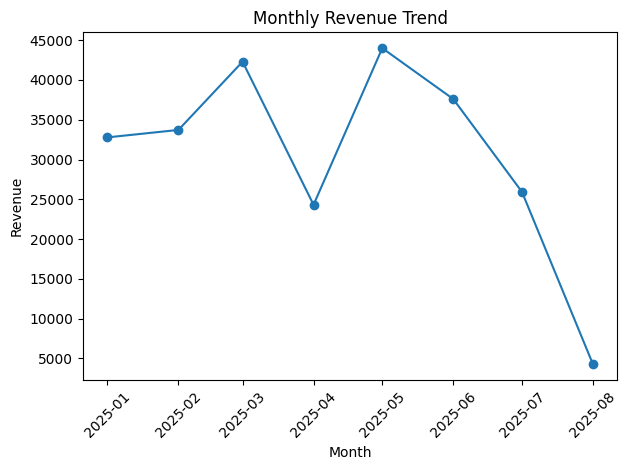

In [347]:
#Monthly revenue trend
g1 = """
SELECT date_trunc('month', transaction_date)::date AS month,
       SUM(total_amount) AS revenue
FROM Sales_Transactions
GROUP BY 1
ORDER BY 1;
"""
df = run(g1)

plt.figure()
plt.plot(df["month"], df["revenue"], marker="o")
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\dengx\AppData\Local\Temp\ipykernel_422836\3820500114.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(sql, conn, params=params)


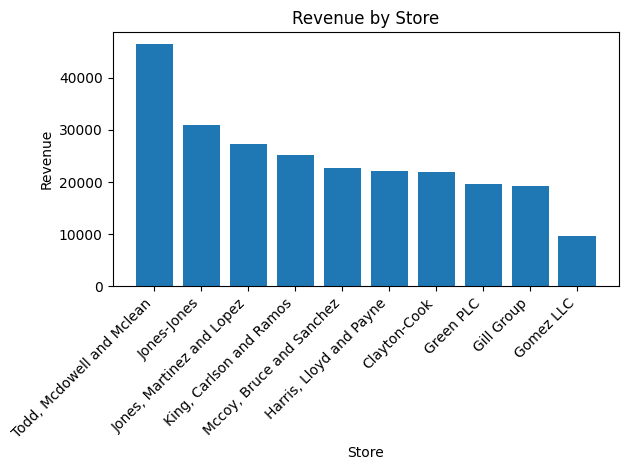

In [348]:
#Revenue by store
g2 = """
SELECT s.name AS store, SUM(st.total_amount) AS revenue
FROM Sales_Transactions st
JOIN Stores s ON s.store_id = st.store_id
GROUP BY s.name
ORDER BY revenue DESC;
"""
df = run(g2)

plt.figure()
plt.bar(df["store"], df["revenue"])
plt.title("Revenue by Store")
plt.xlabel("Store")
plt.ylabel("Revenue")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


C:\Users\dengx\AppData\Local\Temp\ipykernel_422836\3820500114.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(sql, conn, params=params)


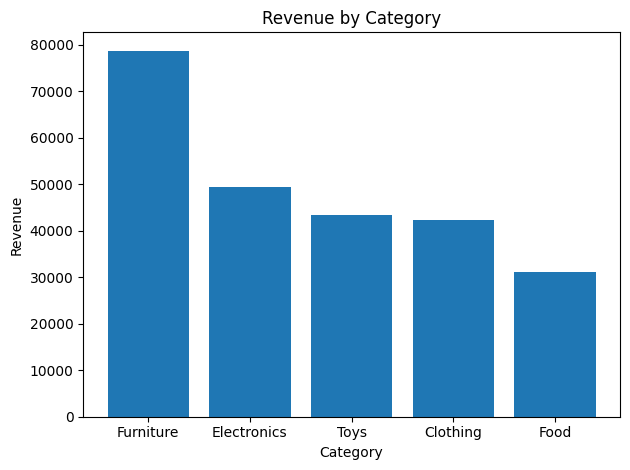

In [349]:
g3 = """
SELECT p.category,
       SUM(ti.quantity * ti.unit_price) AS revenue
FROM Transaction_Items ti
JOIN Products p ON p.product_id = ti.product_id
GROUP BY p.category
ORDER BY revenue DESC;
"""
df = run(g3)

plt.figure()
plt.bar(df["category"], df["revenue"])
plt.title("Revenue by Category")
plt.xlabel("Category")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()


C:\Users\dengx\AppData\Local\Temp\ipykernel_422836\3820500114.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(sql, conn, params=params)


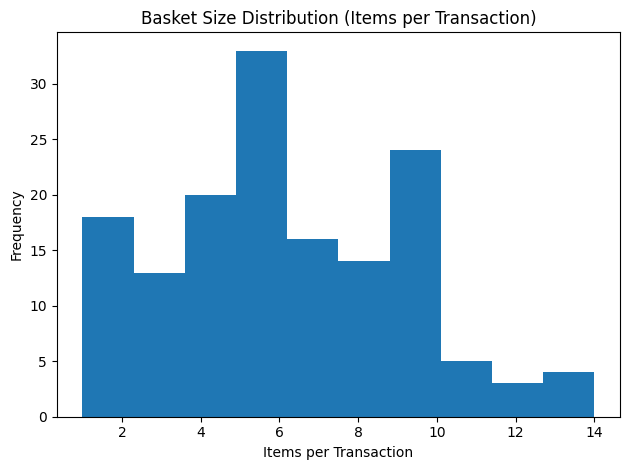

In [350]:
#Basket size distribution
g4 = """
SELECT ti.transaction_id, SUM(ti.quantity) AS items_in_tx
FROM Transaction_Items ti
GROUP BY ti.transaction_id;
"""
df = run(g4)

plt.figure()
plt.hist(df["items_in_tx"], bins=10)
plt.title("Basket Size Distribution (Items per Transaction)")
plt.xlabel("Items per Transaction")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


C:\Users\dengx\AppData\Local\Temp\ipykernel_422836\3820500114.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(sql, conn, params=params)


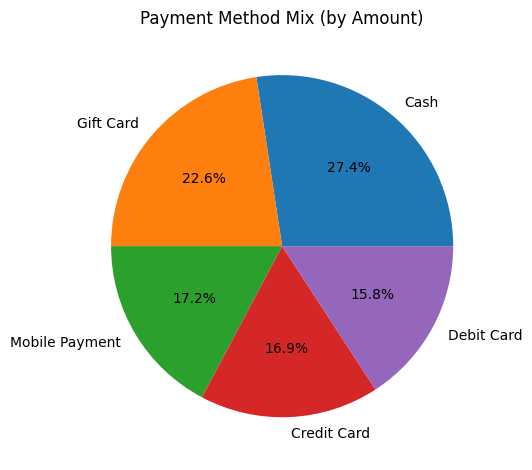

In [351]:
#Payment method mix
g5 = """
SELECT payment_method, SUM(amount) AS amount
FROM Payments
GROUP BY payment_method
ORDER BY amount DESC;
"""
df = run(g5)

plt.figure()
plt.pie(df["amount"], labels=df["payment_method"], autopct="%1.1f%%")
plt.title("Payment Method Mix (by Amount)")
plt.tight_layout()
plt.show()


C:\Users\dengx\AppData\Local\Temp\ipykernel_422836\3820500114.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(sql, conn, params=params)


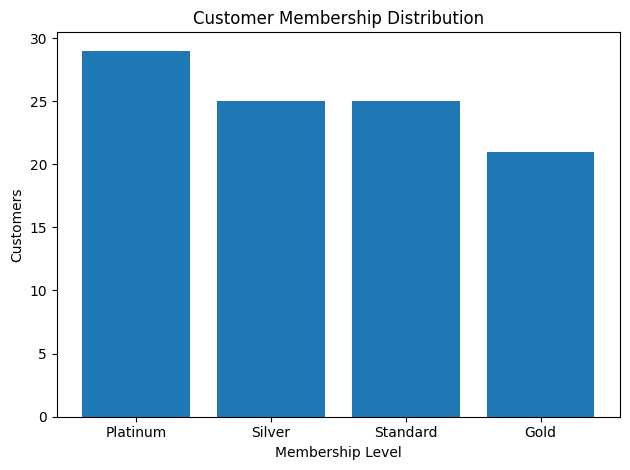

In [352]:
#Customer membership distribution
g6 = """
SELECT membership_level, COUNT(*) AS cnt
FROM Customers
GROUP BY membership_level
ORDER BY cnt DESC;
"""
df = run(g6)

plt.figure()
plt.bar(df["membership_level"], df["cnt"])
plt.title("Customer Membership Distribution")
plt.xlabel("Membership Level")
plt.ylabel("Customers")
plt.tight_layout()
plt.show()


C:\Users\dengx\AppData\Local\Temp\ipykernel_422836\3820500114.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(sql, conn, params=params)


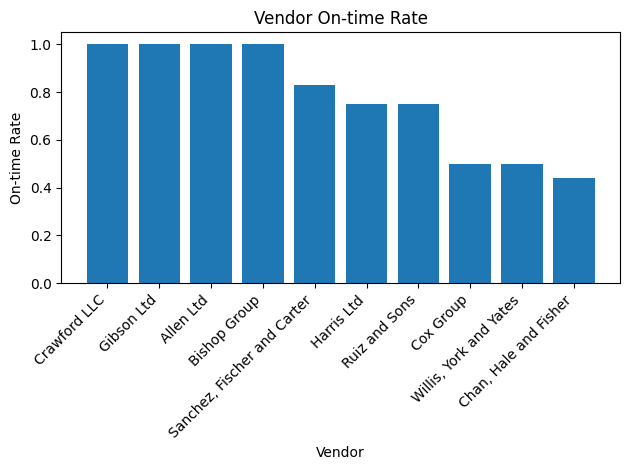

In [353]:
#Vendor on-time rate
g7 = """
SELECT v.name AS vendor,
       COUNT(*) AS deliveries,
       AVG((d.delivered_at::date - o.order_date)) AS avg_lead_days,
       AVG(CASE WHEN d.delivered_at::date <= o.order_date + INTERVAL '5 days'
           THEN 1 ELSE 0 END)::numeric(5,2) AS on_time_rate
FROM Deliveries d
JOIN Orders o  ON o.order_id = d.order_id
JOIN Vendors v ON v.vendor_id = o.vendor_id
GROUP BY v.name
ORDER BY on_time_rate DESC, avg_lead_days ASC;
"""
df = run(g7)

plt.figure()
plt.bar(df["vendor"], df["on_time_rate"])
plt.title("Vendor On-time Rate")
plt.xlabel("Vendor")
plt.ylabel("On-time Rate")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


C:\Users\dengx\AppData\Local\Temp\ipykernel_422836\3820500114.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(sql, conn, params=params)


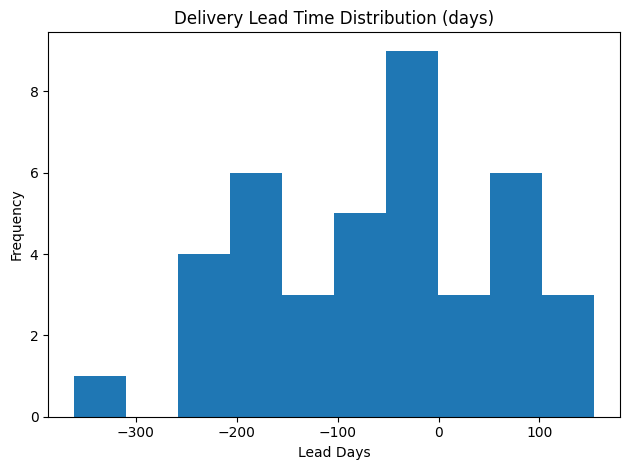

In [354]:
#Delivery lead time distribution
g8 = """
SELECT (d.delivered_at::date - o.order_date) AS lead_days
FROM Deliveries d
JOIN Orders o ON o.order_id = d.order_id;
"""
df = run(g8)
lead_days = df["lead_days"].astype(float).dropna()

plt.figure()
plt.hist(lead_days, bins=10)
plt.title("Delivery Lead Time Distribution (days)")
plt.xlabel("Lead Days")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


C:\Users\dengx\AppData\Local\Temp\ipykernel_422836\3820500114.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(sql, conn, params=params)


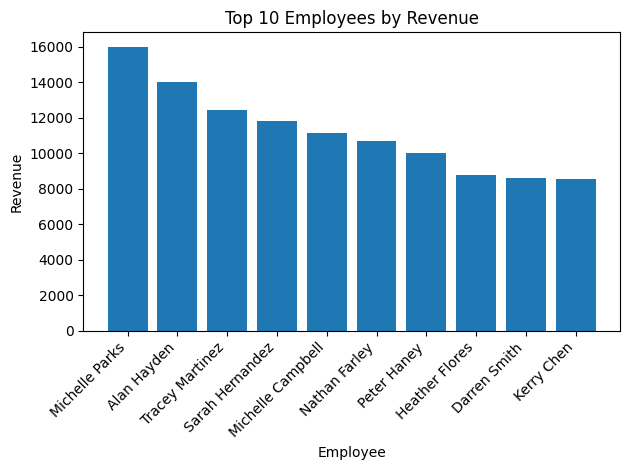

In [355]:
#Top 10 employees by revenue
g9 = """
SELECT e.first_name || ' ' || e.last_name AS employee,
       SUM(st.total_amount) AS revenue
FROM Sales_Transactions st
JOIN Employees e ON e.employee_id = st.employee_id
GROUP BY employee
ORDER BY revenue DESC
LIMIT 10;
"""
df = run(g9)

plt.figure()
plt.bar(df["employee"], df["revenue"])
plt.title("Top 10 Employees by Revenue")
plt.xlabel("Employee")
plt.ylabel("Revenue")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
